In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\vijay\OneDrive\Desktop\jupyter\IMDB\IMDB Dataset.csv")

df.shape

(50000, 2)

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [5]:
null_values = df.isnull().sum()
print(null_values)

review       0
sentiment    0
dtype: int64


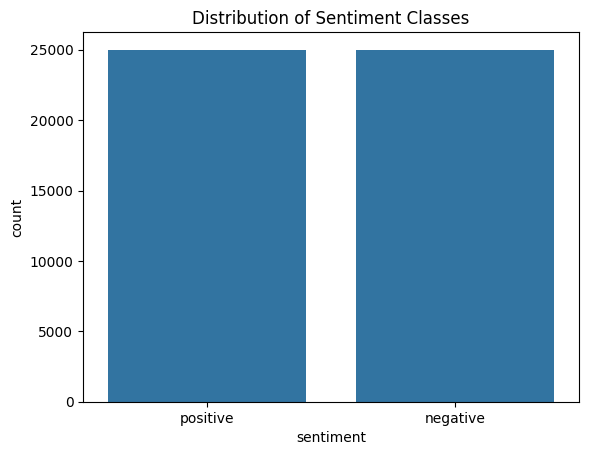

In [6]:
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiment Classes')
plt.show()

In [7]:
df['review_length'] = df['review'].apply(len)

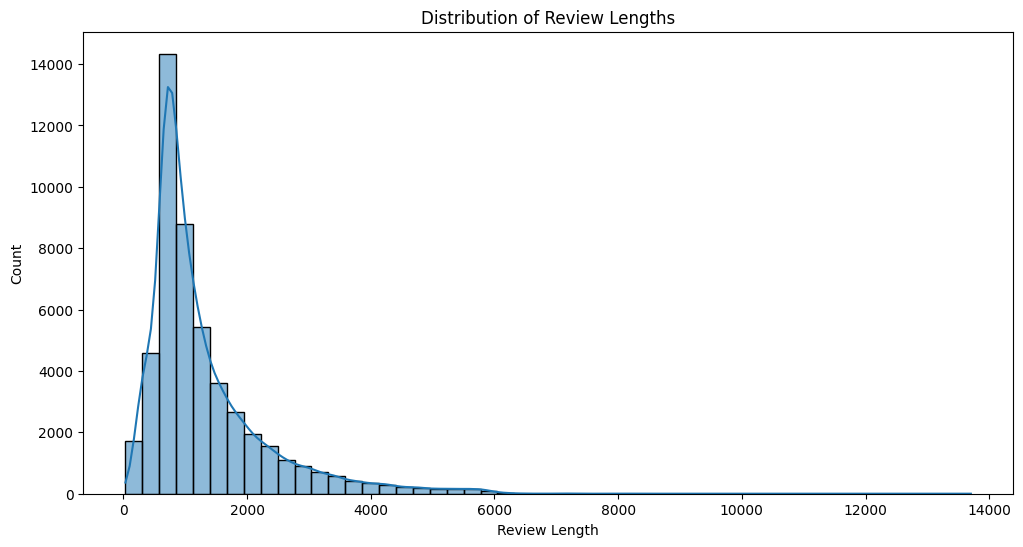

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()


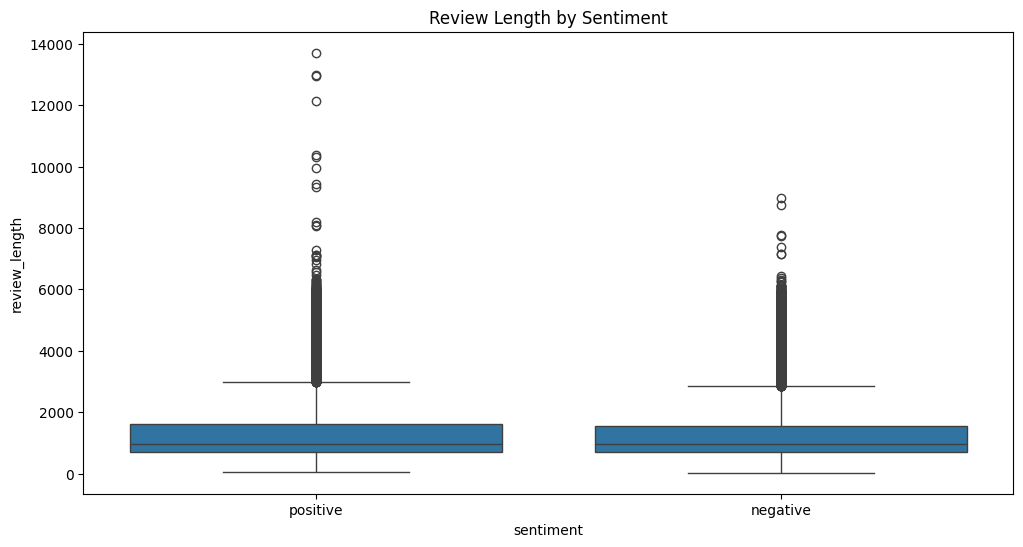

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title('Review Length by Sentiment')
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X = df['review']
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0) 


vectorizer = TfidfVectorizer(max_features=2000)  
X_vectorized = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.svm import SVC


svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


NameError: name 'accuracy_score' is not defined

In [12]:
from sklearn.metrics import accuracy_score, classification_report


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [14]:

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8838
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.89      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


log_reg = LogisticRegression(max_iter=100, solver='liblinear') 
log_reg.fit(X_train, y_train)


y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8862
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [16]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)  
tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7357
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.70      4961
           1       0.70      0.84      0.76      5039

    accuracy                           0.74     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.74      0.73     10000



In [17]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8161
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      4961
           1       0.79      0.86      0.83      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [18]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7055
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.68      4961
           1       0.69      0.76      0.72      5039

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

